In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
path = r'Datasets/cardekho.csv'
data = pd.read_csv(path)

In [ ]:
data

In [ ]:
data.hist(figsize=(20, 13));

In [ ]:
data.info()

In [ ]:
(data == 0).sum()

In [ ]:
data.isnull().sum()

In [ ]:
columns_to_impute = ['mileage(km/ltr/kg)', 'engine']
to_imputer = KNNImputer(n_neighbors=10)

data[columns_to_impute] = to_imputer.fit_transform(data[columns_to_impute])

In [ ]:
data.info()

In [ ]:
to_OHE = ['name', 'year', 'fuel', 'seller_type', 'transmission', 'owner', 'max_power']
data_encoded = pd.concat([data.drop(columns=to_OHE), pd.get_dummies(data[to_OHE])], axis=1)

In [ ]:
data_encoded

In [ ]:
columns_of_interest = ['name', 'year', 'fuel', 'seller_type', 'transmission', 'owner', 'max_power']

# بررسی تعداد مقادیر یکتا در ستون‌های انتخاب شده
for column in columns_of_interest:
    unique_count = data[column].nunique()  # تعداد مقادیر یکتا (منحصر به فرد)
    print(f"ستون {column} شامل {unique_count} مقدار منحصر به فرد است.")

In [ ]:
data_encoded.info()

In [ ]:
columns_name = data_encoded.columns.to_list()
to_MMS = MinMaxScaler()
data_encoded[columns_name] = to_MMS.fit_transform(data_encoded[columns_name])

In [ ]:
data_encoded

In [ ]:
data_encoded.info()

In [ ]:
file_path = r'Datasets/processed_data.csv'
data_encoded.to_csv(file_path, index=False)
print(f"داده‌های پردازش شده با موفقیت ذخیره شدند در: {file_path}")

In [ ]:
X = data_encoded.drop('selling_price', axis=1).values
y = data_encoded['selling_price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
xg_reg = xgb.XGBRegressor(colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=1000, verbosity=3)
xg_reg.fit(X_train, y_train)

In [ ]:
y_pred = xg_reg.predict(X_test)
metrics.mean_absolute_error(y_test, y_pred)

In [ ]:
metrics.r2_score(y_test, y_pred)

<Figure size 1500x1000 with 0 Axes>

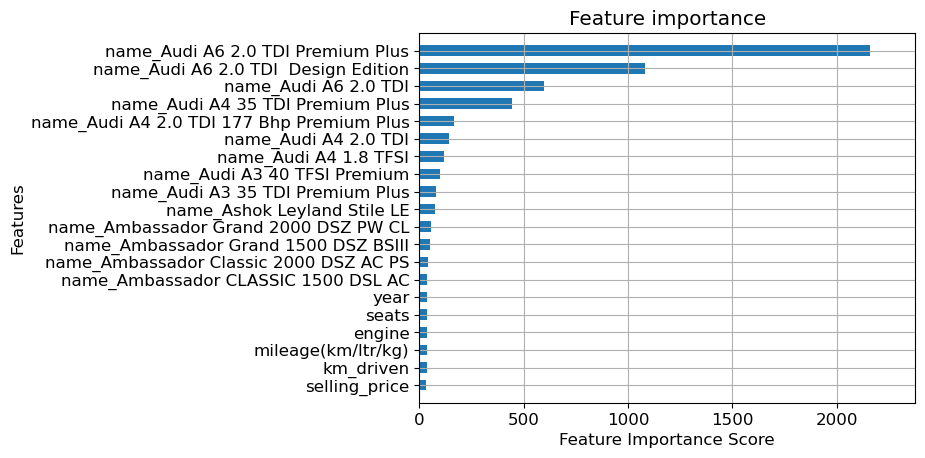

In [150]:

# در اینجا فرض می‌کنیم xg_reg یک مدل XGBoost با استفاده از داده‌های df باشد
# df.columns: لیست نام ستون‌های داده‌ی شما

plt.figure(figsize=(15, 10))  # تنظیم اندازه نمودار

# نمایش اهمیت ویژگی‌ها با نام ستون‌ها و محدود کردن تعداد به ۲۰ ستون اول
xgb.plot_importance(xg_reg, max_num_features=20, height=0.6, show_values=False, importance_type='weight')

# به دست آوردن نام ستون‌ها
feature_names = data_encoded.columns

# تنظیم محور x بر اساس نام ستون‌ها
plt.yticks(ticks=list(range(20)), labels=feature_names[:20])  # فقط ۲۰ ستون اول را نمایش می‌دهیم
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.savefig('Datasets/feature_importance_plot.png')
plt.show()
